In [1]:
import sqlite3
#using Python’s sqlite3 library, I created a database file and a table named sales.
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")

conn.commit()
conn.close()

print("Database created!")


Database created!


In [3]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
#I added multiple rows for 3 products (iPhone 13, 14, 15) with quantity & price.
data = [
("iPhone 14",10,60000),("iPhone 14",8,60000),("iPhone 14",12,60000),("iPhone 14",5,60000),
("iPhone 15",7,70000),("iPhone 15",9,70000),("iPhone 15",6,70000),("iPhone 15",11,70000),
("iPhone 16",5,82000),("iPhone 16",8,82000),("iPhone 16",10,82000),
("AirPods Pro",12,22000),("AirPods Pro",9,22000),("AirPods Pro",15,22000),
("AirPods 3",18,16000),("AirPods 3",14,16000),("AirPods 3",20,16000),
("Apple Watch SE",7,28000),("Apple Watch SE",5,28000),("Apple Watch SE",9,28000),
("Apple Watch Ultra",3,89000),("Apple Watch Ultra",4,89000),("Apple Watch Ultra",2,89000),
("iPad Air",6,50000),("iPad Air",7,50000),("iPad Air",5,50000),
("iPad Pro",3,83000),("iPad Pro",4,83000),("iPad Pro",2,83000),
("MacBook Air M1",4,95000),("MacBook Air M1",6,95000),("MacBook Air M1",5,95000),
("MacBook Air M2",3,115000),("MacBook Air M2",2,115000),("MacBook Air M2",4,115000),
("MacBook Pro M2",2,145000),("MacBook Pro M2",3,145000),("MacBook Pro M2",1,145000),
("Apple TV 4K",10,14000),("Apple TV 4K",12,14000)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

conn.commit()
conn.close()



In [4]:
print("40 rows inserted into sales table!")

40 rows inserted into sales table!


In [5]:
#like total quantity sold, total revenue

import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

df = pd.read_sql_query(query, conn) #This converted SQL output into a DataFrame.
conn.close()

df


,product,total_qty,revenue
0,AirPods 3,104,1664000.0
1,AirPods Pro,72,1584000.0
2,Apple TV 4K,44,616000.0
3,Apple Watch SE,42,1176000.0
4,Apple Watch Ultra,18,1602000.0
5,MacBook Air M1,30,2850000.0
6,MacBook Air M2,18,2070000.0
7,MacBook Pro M2,12,1740000.0
8,iPad Air,36,1800000.0
9,iPad Pro,18,1494000.0


In [7]:
#Summarize Sales
print("Sales Summary:")
print(df)

Sales Summary:
              product  total_qty    revenue
0           AirPods 3        104  1664000.0
1         AirPods Pro         72  1584000.0
2         Apple TV 4K         44   616000.0
3      Apple Watch SE         42  1176000.0
4   Apple Watch Ultra         18  1602000.0
5      MacBook Air M1         30  2850000.0
6      MacBook Air M2         18  2070000.0
7      MacBook Pro M2         12  1740000.0
8            iPad Air         36  1800000.0
9            iPad Pro         18  1494000.0
10          iPhone 14         70  4200000.0
11          iPhone 15         66  4620000.0
12          iPhone 16         46  3772000.0


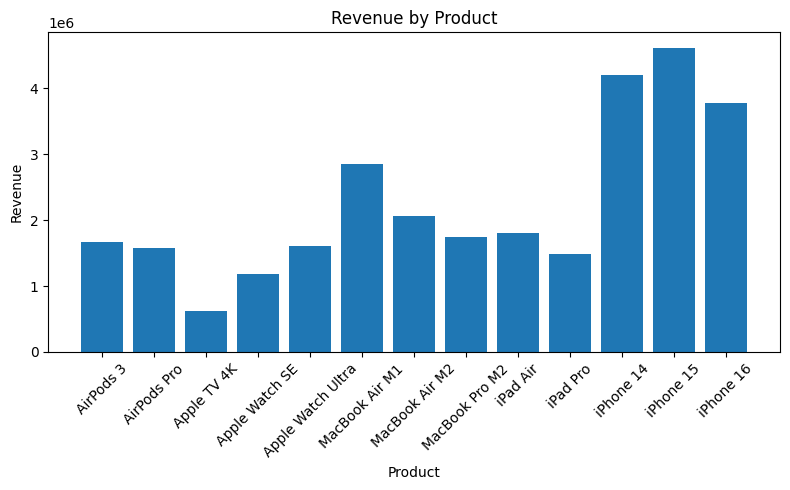

In [10]:
#Plot a Bar Chart (Revenue by Product)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df['product'], df['revenue'])
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() #I visualized revenue by product using:


In [9]:
#Save the Chart
plt.savefig("sales_chart.png")
print("Chart saved as sales_chart.png")

Chart saved as sales_chart.png


<Figure size 640x480 with 0 Axes>